## Set-Up the Environment

In [1]:
import pyabf
import slopeTools
import abfTools
import plotTools
import statsTools
import numpy as np
import matplotlib.pyplot as plt

## Moving Window Mean

This function creates a new set of data where each point is the mean of the adjacent `N` points (where `N` is defined by `windowSize`)

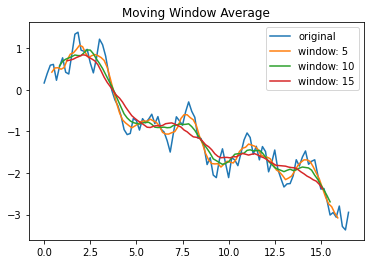

In [2]:
def demonstrateMovingWindowMean(pointCount = 100):
    """
    Demonstrate the moving window average method on random data using multiple window sizes
    """
    values = np.cumsum(np.random.random_sample(pointCount) - .5) # random walk
    times = np.arange(pointCount) * 10/60

    plt.figure()
    plt.plot(times, values, label="original")

    for windowSize in [5, 10, 15]:
        smoothValues, smoothTimes = statsTools.smoothY(values, times, windowSize) 
        plt.plot(smoothTimes, smoothValues, label=f"window: {windowSize}")
    
    plt.title("Moving Window Average")
    plt.legend()
    plt.show()
    
demonstrateMovingWindowMean()

## ABF Holding Current Slope Analysis
* Get holding current from every sweep
* Apply a moving window filter to smooth the data
* Report the slope between every data point

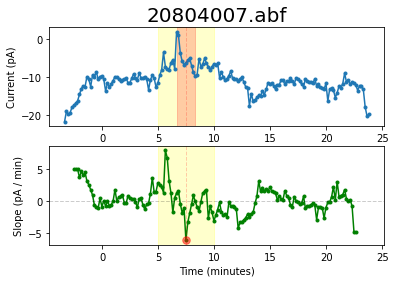

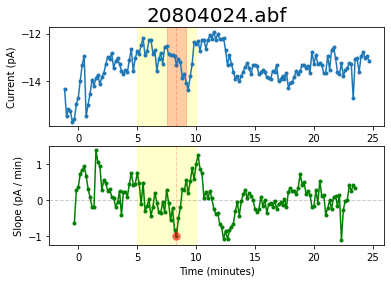

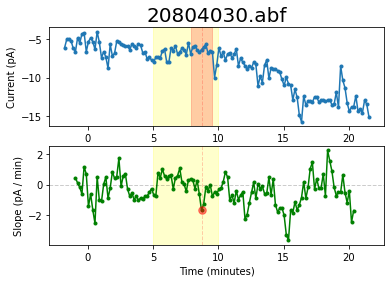

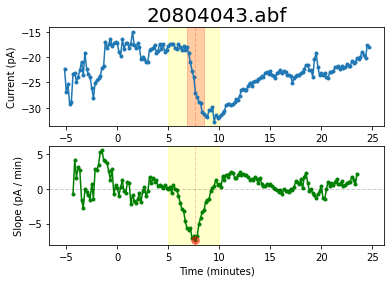

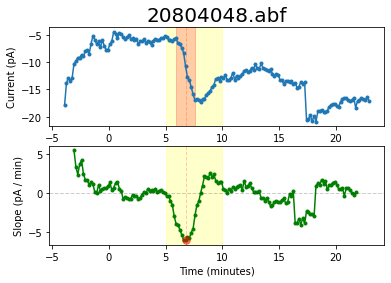

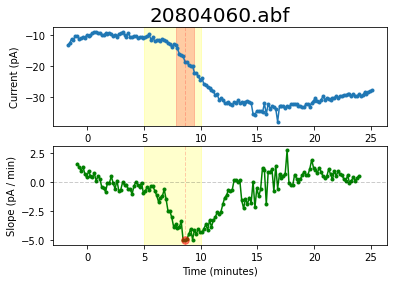

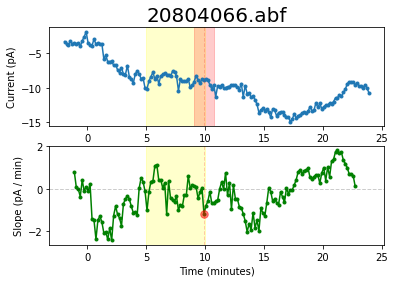

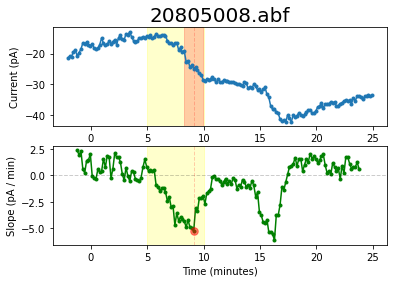

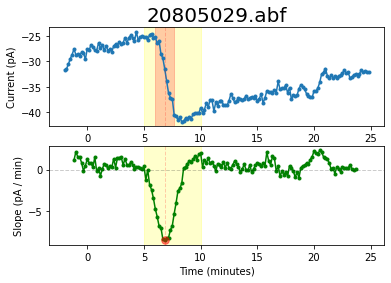

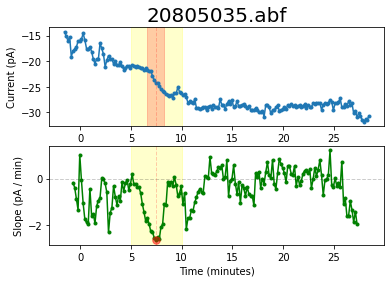

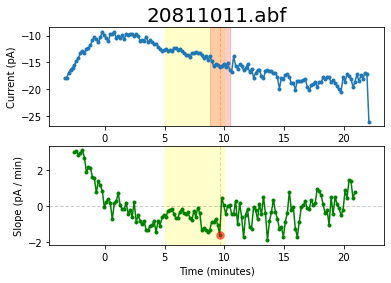

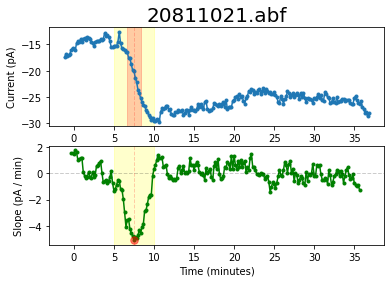

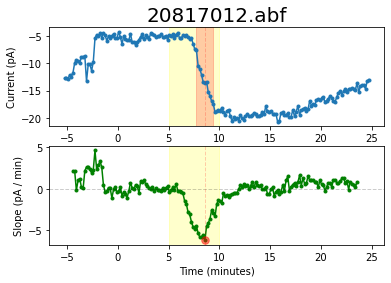

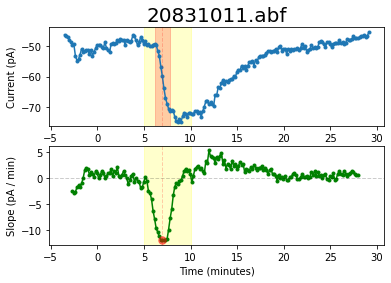

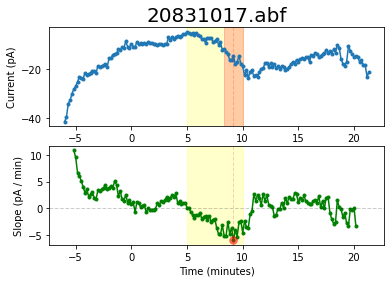

In [3]:
windowSize = 10 #sweeps
sweepLength = 10/60 #min

abfFilePaths = [
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804007.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804024.abf", 
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804030.abf", 
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804043.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804048.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804060.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804066.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805008.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805029.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805035.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811011.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811021.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817012.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831011.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831017.abf"
]

for abfFilePath in abfFilePaths:
    
    # Get raw holding current
    currentsRaw, timesRaw, abfID = abfTools.meanIhold(abfFilePath)
    
    # Get smoothed holding current
    currentsSmooth, currentsSmoothTimes = statsTools.smoothY(currentsRaw, timesRaw, windowSize)
    
    # Get slopes of consecutive data points
    slopes = slopeTools.consecutiveSlopes(currentsSmooth, currentsSmoothTimes)
    currentsSmoothTimes = currentsSmoothTimes[0:len(slopes)]
        
    # Determine the time of the first tag. Later it will be aligned to be 5 minutes
    firstTagTime = abfTools.getFirstTagTime(abfFilePath)

    # Get the peak slope during a limited range of time
    peakSlopeTimeMin = 5
    peakSlopeTimeMax = 10
    peakSlope = statsTools.rangeMin(slopes, currentsSmoothTimes, peakSlopeTimeMin, peakSlopeTimeMax)
    peakSlopeIndex = slopes.index(peakSlope)
    peakSlopeTime = currentsSmoothTimes[peakSlopeIndex]

    # TODO: plot the smoothed trace on top of the raw data
    plotTools.currentSlopeTimePlot(currentsRaw, timesRaw, slopes, currentsSmoothTimes, peakSlopeTime, 
                                   peakSlope, windowSize, sweepLength, abfFilePath)